In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('/content/train_set_final (1).txt')
df.head(1)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand,age,dict_days_of_transactions,western_europe,central_eastern_europe,southern_europe,northern_europe,not_europe,total_amount,number_transactions,avg_amount,ATM,CARD_PAYMENT,CARD_REFUND,EXCHANGE,CASHBACK,FEES,TOPUP,TRANSFER,EUR,GBP,PLN,OTHER,RON,USD,REENGAGEMENT_ACTIVE_FUNDS,PROMO,NO_INITIAL_CARD_ORDER,INVEST_IN_GOLD,NO_INITIAL_CARD_USE,PROMO_CARD_ORDER,LOST_CARD_ORDER,JOINING_ANNIVERSARY,ONBOARDING_TIPS_ACTIVATED_USERS,BLACK_FRIDAY,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,ENGAGEMENT_SPLIT_BILL_RESTAURANT,SILVER_ENGAGEMENT_INACTIVE_CARD,WELCOME_BACK,METAL_RESERVE_PLAN,BLUE_TUESDAY,SILVER_ENGAGEMENT_FEES_SAVED
0,user_0,1992,southern_europe,Madrid,2018-09-10 18:46:42.843855,0,0,1.0,1.0,3,0,0,1,28,161.0,0,0,1,0,0,6925.08,520.0,13.317462,0.0,333.0,1.0,5.0,0.0,0.0,158.0,23.0,25.0,0.0,0.0,495.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(15544, 54)

In [4]:
df.columns

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'brand', 'age',
       'dict_days_of_transactions', 'western_europe', 'central_eastern_europe',
       'southern_europe', 'northern_europe', 'not_europe', 'total_amount',
       'number_transactions', 'avg_amount', 'ATM', 'CARD_PAYMENT',
       'CARD_REFUND', 'EXCHANGE', 'CASHBACK', 'FEES', 'TOPUP', 'TRANSFER',
       'EUR', 'GBP', 'PLN', 'OTHER', 'RON', 'USD', 'REENGAGEMENT_ACTIVE_FUNDS',
       'PROMO', 'NO_INITIAL_CARD_ORDER', 'INVEST_IN_GOLD',
       'NO_INITIAL_CARD_USE', 'PROMO_CARD_ORDER', 'LOST_CARD_ORDER',
       'JOINING_ANNIVERSARY', 'ONBOARDING_TIPS_ACTIVATED_USERS',
       'BLACK_FRIDAY', 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL',
       'ENGAGEMENT_SPLIT_BILL_RESTAURANT', 'SILVER_ENGAGEMENT_INACTIVE

In [0]:
A= df.copy()
A.drop(['user_id', 'birth_year', 'country', 'city', 'created_date','num_referrals', 'num_successful_referrals','CASHBACK','SILVER_ENGAGEMENT_INACTIVE_CARD','SILVER_ENGAGEMENT_FEES_SAVED'],axis=1,inplace=True)


X = A.drop('plan',axis=1)
y = A['plan']

In [0]:
X_trainG,X_testG,y_trainG,y_testG = train_test_split(X,y,test_size=0.3)
X_trainL,X_testL,y_trainL,y_testL = train_test_split(X,y,test_size=0.3)
X_trainS,X_testS,y_trainS,y_testS = train_test_split(X,y,test_size=0.3)
X_trainD,X_testD,y_trainD,y_testD = train_test_split(X,y,test_size=0.3)
X_trainR,X_testR,y_trainR,y_testR = train_test_split(X,y,test_size=0.3)
X_trainR1,X_testR1,y_trainR1,y_testR1 = train_test_split(X,y,test_size=0.3)
X_trainK,X_testK,y_trainK,y_testK = train_test_split(X,y,test_size=0.3)
X_trainN,X_testN,y_trainN,y_testN= train_test_split(X,y,test_size=0.3)
X_trainM,X_testM,y_trainM,y_testM = train_test_split(X,y,test_size=0.3)



**Gradient Boosting Classifier**




In [13]:
scG = StandardScaler()
varG = VarianceThreshold()
samplerG = SMOTE()
mdlG = GradientBoostingClassifier()




pipesG = Pipeline([('scaler', scG),
                  ('selector', varG),
                  ('sampler', samplerG),
                  ('model', mdlG)])

gridG = {'selector__threshold': [0.5],
         'model__learning_rate': [0.1],
         'model__n_estimators':[250]
         
         }

clfG= GridSearchCV(pipesG,gridG,cv=5)
clfG.fit(X_trainG, y_trainG)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [14]:
print(clfG.best_params_, '\n')

print(classification_report(y_testG, clfG.predict(X_testG)))

{'model__learning_rate': 0.1, 'model__n_estimators': 250, 'selector__threshold': 0.5} 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4294
           1       0.70      0.68      0.69       370

    accuracy                           0.95      4664
   macro avg       0.84      0.83      0.83      4664
weighted avg       0.95      0.95      0.95      4664



[[4186  120]
 [ 108  250]]


Text(48.5, 0.5, 'Actual classes')

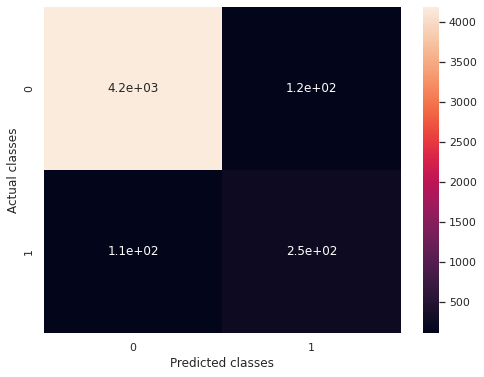

In [15]:
sns.set(rc={'figure.figsize':(8,6)})
cfmG = confusion_matrix(clfG.predict(X_testG), y_testG.values)
sns.heatmap(cfmG, annot=True)
print(cfmG)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Logistic Regression**

In [16]:
scL = StandardScaler()
varL = VarianceThreshold()
samplerL = SMOTE()
mdlL = LogisticRegression()




pipesL = Pipeline([('scaler', scL),
                  ('selector', varL),
                  ('sampler', samplerL),
                  ('model', mdlL)])

gridL = {'selector__threshold': [0.4],
         'model__penalty': ['l1','l2'],
          'model__C':[0.0,0.5,1.0,2.0]}
         
       

clfL= GridSearchCV(pipesL,gridL,cv=5)
clfL.fit(X_trainL, y_trainL)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters 

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [17]:
print(clfL.best_params_, '\n')

print(classification_report(y_testL, clfL.predict(X_testL)))

{'model__C': 2.0, 'model__penalty': 'l2', 'selector__threshold': 0.4} 

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      4296
           1       0.51      0.83      0.63       368

    accuracy                           0.92      4664
   macro avg       0.75      0.88      0.79      4664
weighted avg       0.95      0.92      0.93      4664



[[4003   63]
 [ 293  305]]


Text(48.5, 0.5, 'Actual classes')

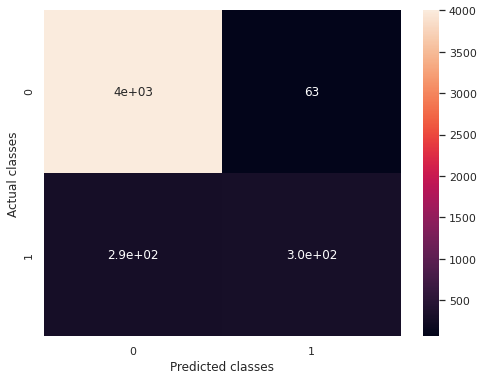

In [18]:
sns.set(rc={'figure.figsize':(8,6)})
cfmL = confusion_matrix(clfL.predict(X_testL), y_testL.values)
sns.heatmap(cfmL, annot=True)
print(cfmL)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Support Vector Machines**

In [19]:
scS = StandardScaler()
varS = VarianceThreshold()
smpS = SMOTE()
mdlS = svm.SVC()

pipeS= Pipeline ([('scaler',scS),
                  ('selector',varS),
                  ('sampler',smpS),
                  ('model',mdlS)])


gridS = {}

clfS= GridSearchCV(pipeS,gridS,cv=3)
clfS.fit(X_trainS,y_trainS)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                        SVC(C

In [20]:
print(clfS.best_params_, '\n')

print(classification_report(y_testS, clfS.predict(X_testS)))

{} 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4299
           1       0.55      0.75      0.63       365

    accuracy                           0.93      4664
   macro avg       0.76      0.85      0.80      4664
weighted avg       0.94      0.93      0.94      4664



[[4073   92]
 [ 226  273]]


Text(48.5, 0.5, 'Actual classes')

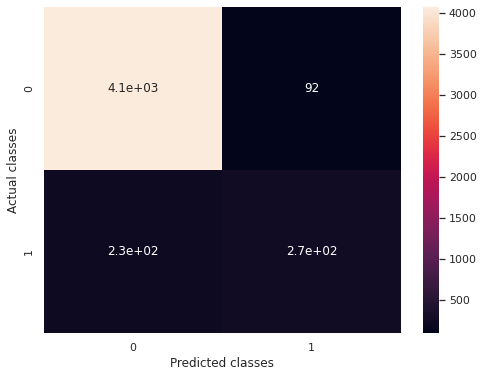

In [21]:
sns.set(rc={'figure.figsize':(8,6)})
cfmS = confusion_matrix(clfS.predict(X_testS), y_testS.values)
sns.heatmap(cfmS, annot=True)
print(cfmS)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Decision Tree Classifier**

In [22]:

scD = StandardScaler()
varD = VarianceThreshold()
samplerD = SMOTE()
mdlD = DecisionTreeClassifier()




pipesD = Pipeline([('scaler', scD),
                  ('selector', varD),
                  ('sampler', samplerD),
                  ('model', mdlD)])

gridD = {'selector__threshold': [0, 0.2, 0.4],
         'model__criterion': ['gini', 'splitter'],
         'model__max_depth':[10,100,1000,2000]
         
         }

clfD= GridSearchCV(pipesD,gridD,cv=5)
clfD.fit(X_trainD, y_trainD)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [23]:
print(clfD.best_params_, '\n')

print(classification_report(y_testD, clfD.predict(X_testD)))

{'model__criterion': 'gini', 'model__max_depth': 10, 'selector__threshold': 0.2} 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4319
           1       0.51      0.66      0.58       345

    accuracy                           0.93      4664
   macro avg       0.74      0.81      0.77      4664
weighted avg       0.94      0.93      0.93      4664



[[4100  116]
 [ 219  229]]


Text(48.5, 0.5, 'Actual classes')

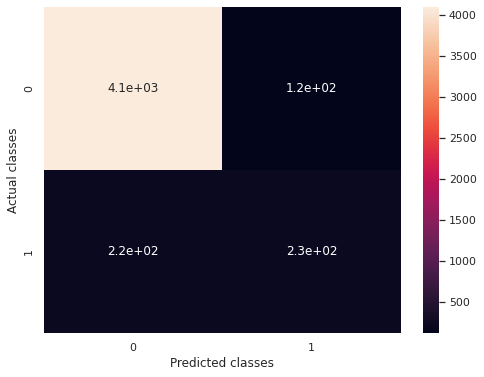

In [24]:
sns.set(rc={'figure.figsize':(8,6)})
cfmD = confusion_matrix(clfD.predict(X_testD), y_testD.values)
sns.heatmap(cfmD, annot=True)
print(cfmD)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

<b>Pre-Scale | Scaled</b>

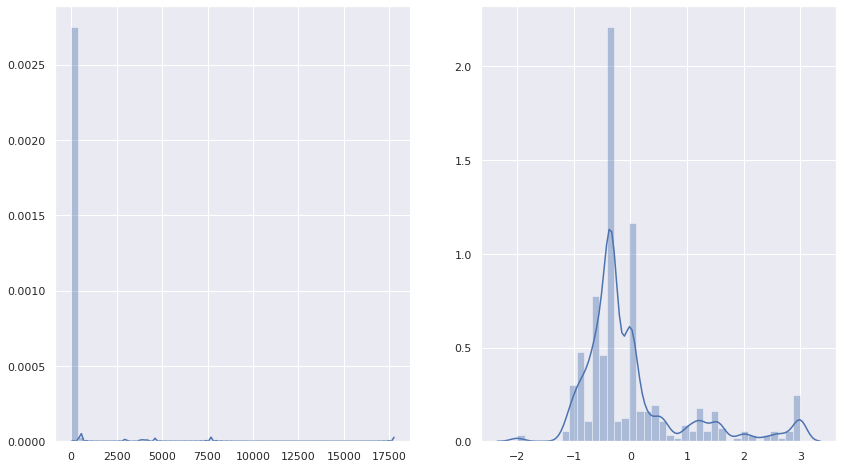

In [25]:
plt.figure(figsize=(14,8))

ax=plt.subplot(121)

sns.distplot((X_trainG.iloc[:10,:]))

ax=plt.subplot(122)

sns.distplot(scG.fit_transform(X_trainG.iloc[:10,:]))




**Random Forest**

In [26]:
scR = StandardScaler()
varR = VarianceThreshold()
samplerR = SMOTE()
mdlR = RandomForestClassifier()




pipesR = Pipeline([('scaler', scR),
                  ('selector', varR),
                  ('sampler', samplerR),
                  ('model', mdlR)])

gridR = {'selector__threshold': [0, 0.2, 0.4],
         'model__criterion': ['gini', 'entropy'],
         'model__max_depth':[10,100,1000,2000],
         'model__n_estimators':[50,100,150]
         
         }

clfR= GridSearchCV(pipesR,gridR,cv=5)
clfR.fit(X_trainR, y_trainR)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                             

In [27]:
print(clfR.best_params_, '\n')

print(classification_report(y_testR, clfD.predict(X_testR)))

{'model__criterion': 'gini', 'model__max_depth': 100, 'model__n_estimators': 150, 'selector__threshold': 0.4} 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4317
           1       0.67      0.78      0.72       347

    accuracy                           0.96      4664
   macro avg       0.83      0.88      0.85      4664
weighted avg       0.96      0.96      0.96      4664



[[4118   40]
 [ 199  307]]


Text(48.5, 0.5, 'Actual classes')

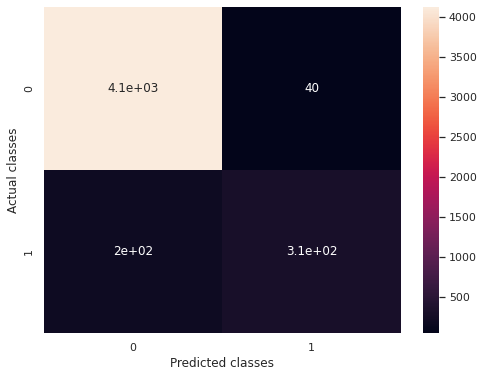

In [28]:
sns.set(rc={'figure.figsize':(8,6)})
cfmR = confusion_matrix(clfS.predict(X_testR), y_testR.values)
sns.heatmap(cfmR, annot=True)
print(cfmR)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

 **Importances Features with Random Forest**

In [0]:


mdlrf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
mdlrf.fit(X_trainR1, y_trainR1)
mdlrf.feature_importances_



In [30]:
X_testR1.columns

Index(['user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts', 'brand',
       'age', 'dict_days_of_transactions', 'western_europe',
       'central_eastern_europe', 'southern_europe', 'northern_europe',
       'not_europe', 'total_amount', 'number_transactions', 'avg_amount',
       'ATM', 'CARD_PAYMENT', 'CARD_REFUND', 'EXCHANGE', 'FEES', 'TOPUP',
       'TRANSFER', 'EUR', 'GBP', 'PLN', 'OTHER', 'RON', 'USD',
       'REENGAGEMENT_ACTIVE_FUNDS', 'PROMO', 'NO_INITIAL_CARD_ORDER',
       'INVEST_IN_GOLD', 'NO_INITIAL_CARD_USE', 'PROMO_CARD_ORDER',
       'LOST_CARD_ORDER', 'JOINING_ANNIVERSARY',
       'ONBOARDING_TIPS_ACTIVATED_USERS', 'BLACK_FRIDAY',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL', 'ENGAGEMENT_SPLIT_BILL_RESTAURANT',
       'WELCOME_BACK', 'METAL_RESERVE_PLAN', 'BLUE_TUESDAY'],
      dtype='object')

In [31]:
preds = mdlrf.predict(X_testR1) # prediction from the best estimator

print(accuracy_score(y_testR1, preds)) # calculating accuracy score
print(classification_report(y_testR1, preds))

0.9481132075471698
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4301
           1       0.82      0.43      0.56       363

    accuracy                           0.95      4664
   macro avg       0.89      0.71      0.77      4664
weighted avg       0.94      0.95      0.94      4664



**KNeighborsClassifier**

In [32]:

scK = StandardScaler()
varK = VarianceThreshold()
samplerK = SMOTE()
mdlK = KNeighborsClassifier()




pipesK = Pipeline([('scaler', scK),
                  ('selector', varK),
                  ('sampler', samplerK),
                  ('model', mdlK)])

gridK = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_neighbors': [5, 10, 15 ,20]}

clfK= GridSearchCV(pipesK,gridK,cv=5)
clfK.fit(X_trainK, y_trainK)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_est...
                                       ('mode

In [33]:
print(clfK.best_params_, '\n')

print(classification_report(y_testK, clfK.predict(X_testK)))

{'model__n_neighbors': 5, 'selector__threshold': 0} 

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4340
           1       0.32      0.68      0.44       324

    accuracy                           0.88      4664
   macro avg       0.65      0.78      0.68      4664
weighted avg       0.93      0.88      0.90      4664



[[3877  105]
 [ 463  219]]


Text(48.5, 0.5, 'Actual classes')

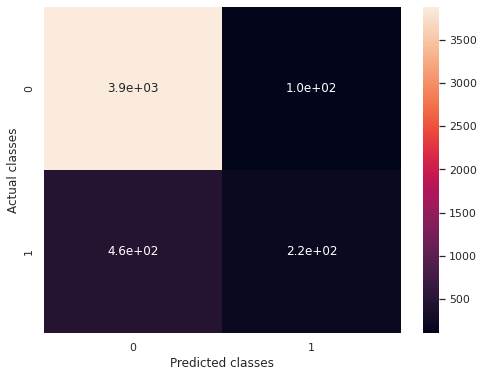

In [34]:
sns.set(rc={'figure.figsize':(8,6)})
cfmK = confusion_matrix(clfK.predict(X_testK), y_testK.values)
sns.heatmap(cfmK, annot=True)
print(cfmK)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**Naive Bayes**

In [35]:
scN = StandardScaler()
varN = VarianceThreshold()
samplerN = SMOTE()
mdlN = GaussianNB()




pipesN = Pipeline([('scaler', scN),
                  ('selector', varN),
                  ('sampler', samplerN),
                  ('model', mdlN)])

gridN = {'selector__threshold': [0, 0.2, 0.4]
         
         
         }

clfN= GridSearchCV(pipesN,gridN,cv=5)
clfN.fit(X_trainN, y_trainN)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                          

In [36]:
print(clfN.best_params_, '\n')

print(classification_report(y_testN, clfN.predict(X_testN)))

{'selector__threshold': 0.2} 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4324
           1       0.35      0.56      0.43       340

    accuracy                           0.89      4664
   macro avg       0.66      0.74      0.69      4664
weighted avg       0.92      0.89      0.90      4664



[[3970  150]
 [ 354  190]]


Text(48.5, 0.5, 'Actual classes')

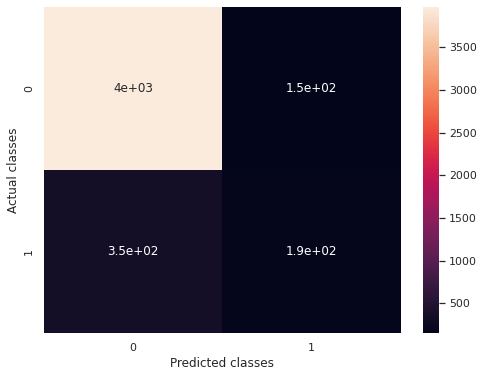

In [37]:
cfmN = confusion_matrix(clfN.predict(X_testN), y_testN.values)
sns.heatmap(cfmN, annot=True)
print(cfmN)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

**MLPClassifier**

In [0]:
scM = StandardScaler()
varM = VarianceThreshold()
samplerM = SMOTE()
mdlM = MLPClassifier()




pipesM = Pipeline([('scaler', scM),
                  ('selector', varM),
                  ('sampler', samplerM),
                  ('model', mdlM)])

gridM = {'selector__threshold': [0, 0.2, 0.4],
          'model__hidden_layer_sizes': [[100], [50], (200,) ],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate_init': [0.0001, 0.001],
    'model__solver': ['sgd', 'adam']
         
         
         }

clfM= GridSearchCV(pipesM,gridM,cv=5)
clfM.fit(X_trainM, y_trainM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning

In [0]:
print(clfM.best_params_, '\n')

print(classification_report(y_testM, clfM.predict(X_testM)))

In [0]:
cfmM = confusion_matrix(clfM.predict(X_testM), y_testM.values)
sns.heatmap(cfmM, annot=True)
print(cfmM)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')